In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

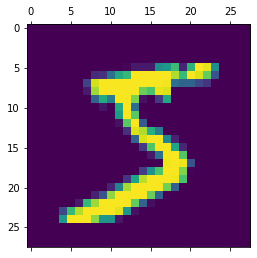

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
x_test_flattened.shape

(10000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (28*28,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 491us/step - loss: 0.7320 - accuracy: 0.8100
Epoch 2/5
1875/1875 [==============================] - 1s 524us/step - loss: 0.3096 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 510us/step - loss: 0.2901 - accuracy: 0.9185
Epoch 4/5
1875/1875 [==============================] - 1s 513us/step - loss: 0.2739 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 1s 526us/step - loss: 0.2694 - accuracy: 0.9257


In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 415us/step - loss: 0.2684 - accuracy: 0.9251


[0.268423855304718, 0.9251000285148621]

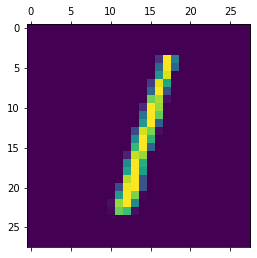

In [17]:
plt.matshow(x_test[2])

In [18]:
y_predicted = model.predict(x_test_flattened)
y_predicted[2]

array([3.8453937e-04, 9.9334133e-01, 6.7042631e-01, 3.4465957e-01,
       2.0738542e-02, 1.0846132e-01, 1.5835223e-01, 1.5656105e-01,
       3.9171833e-01, 4.9193680e-02], dtype=float32)

In [19]:
np.argmax(y_predicted[2])

1

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

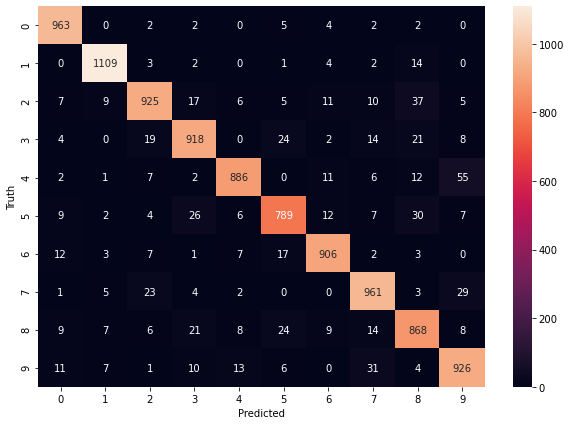

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')


])


model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 695us/step - loss: 0.4581 - accuracy: 0.8698
Epoch 2/5
1875/1875 [==============================] - 1s 687us/step - loss: 0.1355 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 1s 722us/step - loss: 0.0877 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.0670 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.0536 - accuracy: 0.9840


In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 550us/step - loss: 0.0853 - accuracy: 0.9737


[0.0852532908320427, 0.9736999869346619]

Text(69.0, 0.5, 'Truth')

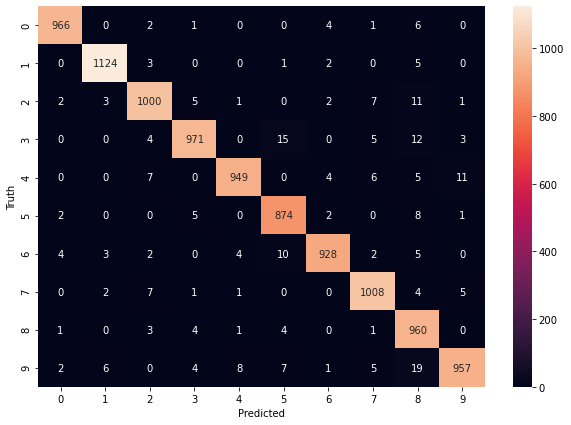

In [38]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

See different types of optimizers, loss, metrics, activation fn etc.